In [20]:
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc,logfbank
import librosa as lr
import os,glob,pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
get_ipython().magic('matplotlib inline')
import soundfile

C:\Users\hp\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
import speech_recognition as sr

In [3]:
def recognize_speech_from_mic(recognizer,microphone):
    if not isinstance(recognizer,sr.Recognizer):
        raise TypeError("'recognizer' must be 'Recognizer' instance")
    if not isinstance(microphone,sr.Microphone):
        raise TypeError("'microphone' must be 'Microphone' instance")
        
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
        
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }
    
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        response["success"]= False
        response["error"] = "API unavailable/unresponsive"
    except sr.UnknownValueError:
        response["error"] = "Unable to recognize speech"

    return response

In [4]:
recognizer = sr.Recognizer()

In [5]:
mic = sr.Microphone(device_index=1)

In [6]:
response = recognize_speech_from_mic(recognizer, mic)

In [7]:
print('\nSuccess : {}\nError :{}\n\nText from Speech\n{}\n\n{}'\
     .format(response['success'],
            response['error'],
            '-'*17,
            response['transcription']))


Success : True
Error :Unable to recognize speech

Text from Speech
-----------------

None


In [14]:
temp_str = ''
records_all = []
while(temp_str != 'bye'):
    print("Speak it out")
    print("Listening...")
    response = recognize_speech_from_mic(recognizer,mic)
    if response['success']:
        temp_str = response['transcription']
        print("You said :",temp_str)
        if (temp_str != 'bye'):
            records_all.append(temp_str)
print("Thanks for your suggetions")
print(f"Your sentences : {records_all}")


Speak it out
Listening...
You said : idiot
Speak it out
Listening...
You said : you are bad
Speak it out
Listening...
You said : sometimes your good
Speak it out
Listening...
You said : ok bye
Speak it out
Listening...
You said : bye
Thanks for your suggetions
Your sentences : ['idiot', 'you are bad', 'sometimes your good', 'ok bye']


In [15]:
if records_all == None:
    records_all.remove(None)
else:
    pass

In [16]:
from textblob import TextBlob

In [17]:
def get_sentiment(sentx):
    analysis = TextBlob(sentx)
    if analysis.sentiment.polarity > 0:
        return ('positive')
    elif analysis.sentiment.polarity == 0:
        return ('neutral') 
    else:
        return ('negative')

In [18]:
sentiments_total = {'neutral':0,'positive':0,'negative':0}
for recd_sent in records_all:
    sentiment = get_sentiment(recd_sent)
    print(sentiment,'====>',recd_sent)
    sentiments_total[sentiment]=sentiments_total[sentiment] + 1
    print("#######################################")
print(sentiments_total)

negative ====> idiot
#######################################
negative ====> you are bad
#######################################
positive ====> sometimes your good
#######################################
positive ====> ok bye
#######################################
{'neutral': 0, 'positive': 2, 'negative': 2}


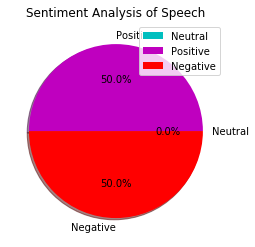

In [19]:
from matplotlib import pyplot as plt
slices = [sentiments_total['neutral'],sentiments_total['positive'],sentiments_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r']

plt.pie(slices,
       labels = activities,
       colors = cols,
       shadow = True,
       autopct='%1.1f%%')

plt.title("Sentiment Analysis of Speech")
plt.legend()
plt.show()